In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Heiti TC'

df_sales = pd.read_csv('./data/易速鲜花订单记录.csv')
df_sales.head()
df_sales.size

697440

In [2]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
df_sales

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京
...,...,...,...,...,...,...,...,...
87175,581585,21684,2021-06-09 12:31:00,产品说明掩码,12,5.00,15804,深圳
87176,581585,22398,2021-06-09 12:31:00,产品说明掩码,12,499.00,15804,深圳
87177,581585,23328,2021-06-09 12:31:00,产品说明掩码,4,58.00,15804,深圳
87178,581585,23145,2021-06-09 12:31:00,产品说明掩码,12,88.90,15804,深圳


([<matplotlib.axis.XTick at 0x1176394e0>,
 [Text(0, 0, '06.2020'),
  Text(1, 0, '07.2020'),
  Text(2, 0, '08.2020'),
  Text(3, 0, '09.2020'),
  Text(4, 0, '10.2020'),
  Text(5, 0, '11.2020'),
  Text(6, 0, '12.2020'),
  Text(7, 0, '01.2021'),
  Text(8, 0, '02.2021'),
  Text(9, 0, '03.2021'),
  Text(10, 0, '04.2021'),
  Text(11, 0, '05.2021'),
  Text(12, 0, '06.2021')])

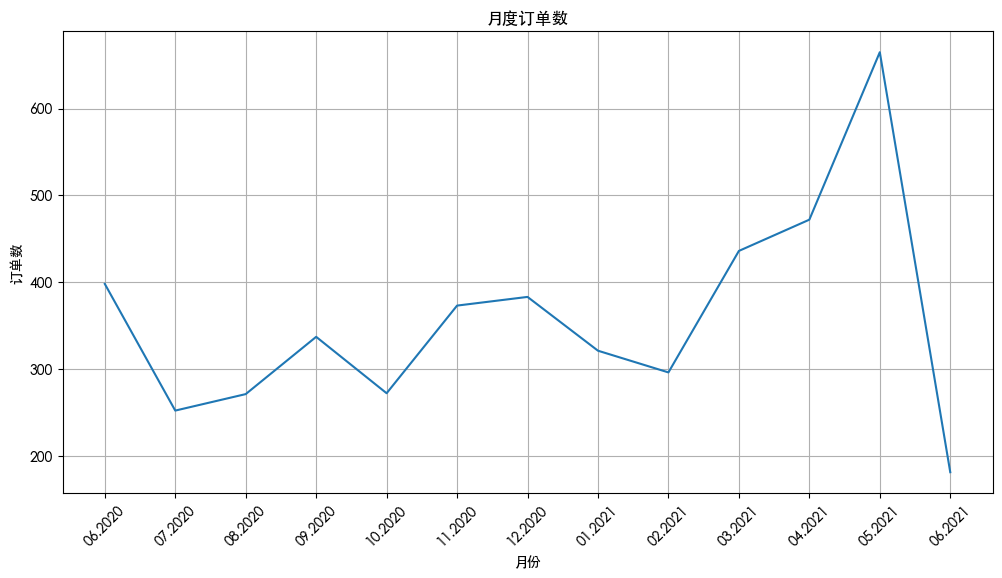

In [3]:
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique() #每个月的订单数量

ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True, figsize=(12,6), legend=False)
ax.set_xlabel('月份')
ax.set_ylabel('订单数')
ax.set_title('月度订单数')

plt.xticks(
    range(len(df_orders_monthly.index)),
    [x.strftime('%m.%Y') for x in df_orders_monthly.index],
    rotation=45
)
# plt.show()

In [4]:
df_sales.describe()

,数量,单价,用户码
count,87180.000000,87180.000000,87180.000000
mean,10.006435,3.584552,15338.503774
std,48.769498,133.436042,392.001142
min,-9360.000000,0.000000,14681.000000
25%,2.000000,1.250000,15022.000000
50%,4.000000,1.950000,15335.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,38970.000000,16019.000000


In [5]:
df_sales = df_sales.loc[df_sales['数量'] > 0]
df_sales.describe()

,数量,单价,用户码
count,85354.000000,85354.000000,85354.000000
mean,10.641833,2.997970,15338.156712
std,33.788964,15.255909,392.798853
min,1.000000,0.000000,14681.000000
25%,2.000000,1.250000,15021.000000
50%,4.000000,1.950000,15334.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,3155.950000,16019.000000


In [6]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价']
df_sales.head()

/var/folders/ts/2q_80lvx3m7_g4lsm7n9bs940000gn/T/ipykernel_7757/206537979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['总价'] = df_sales['数量'] * df_sales['单价']


,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


In [7]:
df_user = pd.DataFrame(df_sales['用户码'].unique())
df_user.columns=['用户码']
df_user = df_user.sort_values(by = '用户码', ascending=True).reset_index(drop=True)
df_user

,用户码
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


In [8]:
df_sales.loc['消费日期'] = pd.to_datetime(df_sales['消费日期'])
df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index()
df_recent_buy.columns=['用户码','最近日期']
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days

df_user = pd.merge(df_user, df_recent_buy[['用户码', 'R值']], on='用户码')
df_user.head()


/var/folders/ts/2q_80lvx3m7_g4lsm7n9bs940000gn/T/ipykernel_7757/370876370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.loc['消费日期'] = pd.to_datetime(df_sales['消费日期'])


,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


In [9]:
df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index()
df_frequency.columns=['用户码', 'F值']
df_user = pd.merge(df_user, df_frequency, on='用户码')
df_user.head()


,用户码,R值,F值
0,14681,70,7
1,14682,187,2
2,14684,25,421
3,14687,106,15
4,14688,7,327


In [10]:
df_revenue = df_sales.groupby('用户码').总价.sum().reset_index()
df_revenue.columns = ['用户码', 'M值']
df_user = pd.merge(df_user, df_revenue, on='用户码')
df_user.head()

,用户码,R值,F值,M值
0,14681,70,7,498.95
1,14682,187,2,52.0
2,14684,25,421,1236.28
3,14687,106,15,628.38
4,14688,7,327,5630.87


<Axes: title={'center': '新进度分布直方图'}, ylabel='Frequency'>

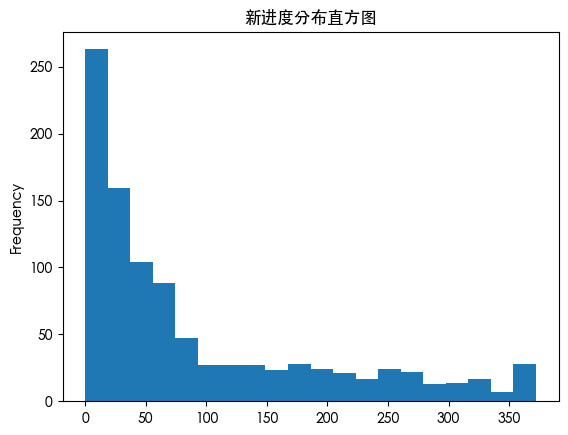

In [11]:
df_user['R值'].plot(kind='hist',bins=20,title='新进度分布直方图')

<Axes: title={'center': '消费频率分布直方图'}, ylabel='Frequency'>

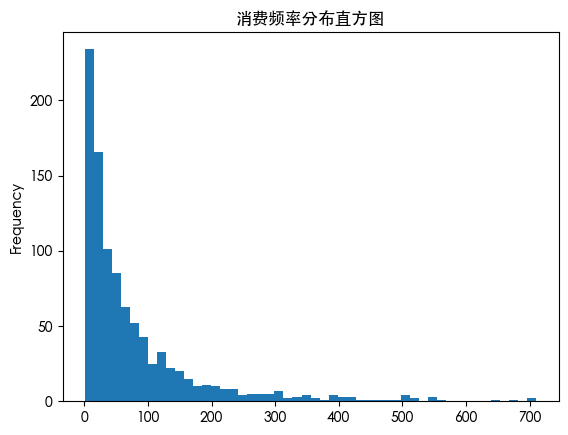

In [12]:
df_user.query('F值<800')['F值'].plot(kind='hist',bins=50,title='消费频率分布直方图')


<Axes: title={'center': '消费金额分布直方图'}, ylabel='Frequency'>

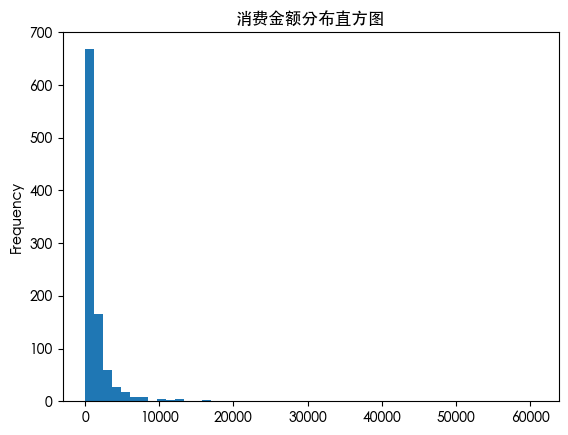

In [13]:
df_user.query('M值<200000')['M值'].plot(kind='hist',bins=50,title='消费金额分布直方图')

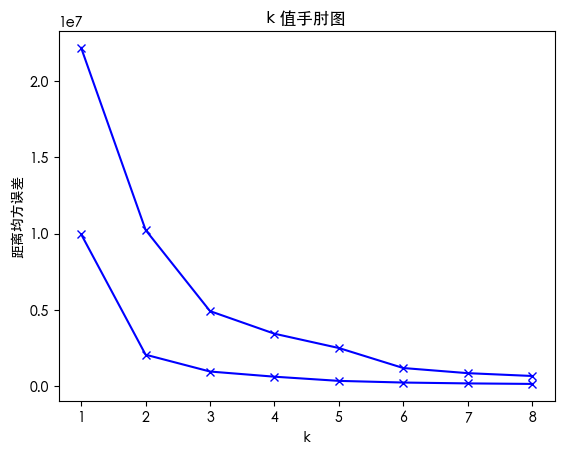

In [18]:
# 手肘法选取 K 值
from sklearn.cluster import KMeans
def show_elbow(df):
    distance_list = [] # 距质心的距离 （损失）
    K = range(1,9)
    for k in K:
        kmeans = KMeans(n_clusters=k, max_iter=100, n_init='auto') # 创建KMeans 模型
        kmeans = kmeans.fit(df) # 拟合模型
        distance_list.append(kmeans.inertia_) #创建每个 k 值的损失
    plt.plot(K, distance_list, 'bx-')
    plt.xlabel('k')
    plt.ylabel('距离均方误差')
    plt.title('k 值手肘图')
    
show_elbow(df_user[['R值']]);


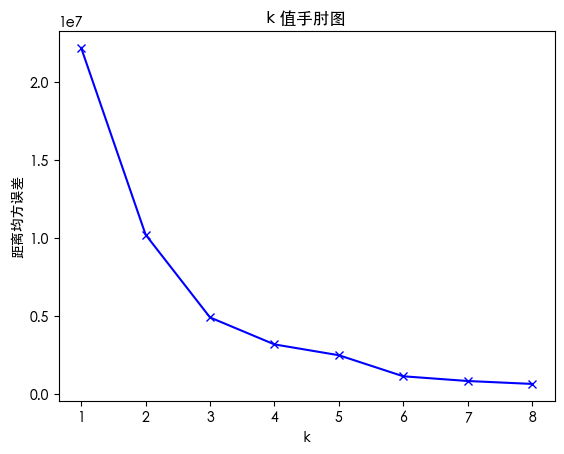

In [15]:
show_elbow(df_user[['F值']])


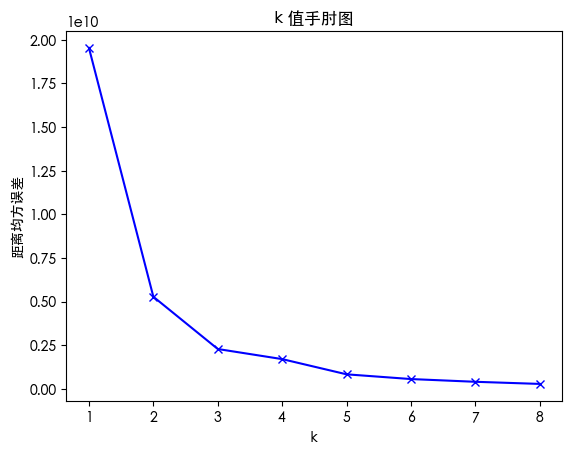

In [16]:
show_elbow(df_user[['M值']])

In [19]:
# 创建和训练模型

from sklearn.cluster import KMeans
kmeans_R = KMeans(n_clusters=3, n_init='auto')
kmeans_F = KMeans(n_clusters=4, n_init='auto')
kmeans_M = KMeans(n_clusters=4, n_init='auto')

kmeans_R.fit(df_user[['R值']])
kmeans_F.fit(df_user[['F值']])
kmeans_M.fit(df_user[['M值']])


KMeans(n_clusters=4, n_init='auto')

In [21]:
# 使用模型进行聚类，并给用户分组

df_user['R值层级'] = kmeans_R.predict(df_user[['R值']]) 
df_user.head()
df_user.groupby('R值层级')['R值'].describe()

,count,mean,std,min,25%,50%,75%,max
R值层级,,,,,,,,
0,667.0,32.371814,25.436366,0.0,10.00,25.0,50.0,95.0
1,175.0,158.228571,36.750702,98.0,127.00,157.0,189.5,225.0
2,138.0,298.094203,45.436550,231.0,255.25,292.5,334.5,372.0


In [24]:
def order_cluster(cluster_name, target_name, df, ascending=False):
    new_cluster_name = 'new_' + cluster_name # 新的聚类名称
    df_new = df.groupby(cluster_name)[target_name].mean().reset_index() # 按聚类结果分组
    df_new = df_new.sort_values(by = target_name, ascending=ascending).reset_index(drop = True)
    df_new['index'] = df_new.index
    df_new = pd.merge(df, df_new[[cluster_name, 'index']], on = cluster_name)
    df_new = df_new.drop([cluster_name], axis = 1)
    df_new = df_new.rename(columns = {"index": cluster_name})
    return df_new

df_user = order_cluster('R值层级','R值', df_user, False)
df_user = df_user.sort_values(by = '用户码', ascending = True).reset_index(drop=True)
df_user.head()
df_user.groupby('R值层级')['R值'].describe()


,count,mean,std,min,25%,50%,75%,max
R值层级,,,,,,,,
0,138.0,298.094203,45.436550,231.0,255.25,292.5,334.5,372.0
1,175.0,158.228571,36.750702,98.0,127.00,157.0,189.5,225.0
2,667.0,32.371814,25.436366,0.0,10.00,25.0,50.0,95.0


In [26]:
df_user['F值层级'] = kmeans_F.predict(df_user[['F值']])
df_user = order_cluster('F值层级', 'F值', df_user, True)
df_user.groupby('F值层级')['F值'].describe()
df_user = df_user.sort_values(by = '用户码', ascending = True).reset_index(drop=True)
df_user.head()

,用户码,R值,F值,M值,R值层级,F值层级
0,14681,70,7,498.95,2,0
1,14682,187,2,52.0,1,0
2,14684,25,421,1236.28,2,1
3,14687,106,15,628.38,1,0
4,14688,7,327,5630.87,2,1


In [28]:
df_user['M值层级'] = kmeans_M.predict(df_user[['M值']])
df_user = order_cluster('M值层级', 'M值', df_user, True)
df_user.groupby('M值层级')['M值'].describe()
df_user = df_user.sort_values(by = '用户码', ascending = True).reset_index(drop=True)
df_user.head()

,用户码,R值,F值,M值,R值层级,F值层级,M值层级
0,14681,70,7,498.95,2,0,0
1,14682,187,2,52.0,1,0,0
2,14684,25,421,1236.28,2,1,0
3,14687,106,15,628.38,1,0,0
4,14688,7,327,5630.87,2,1,1


In [30]:
df_user['总分'] = df_user['R值层级'] + df_user['F值层级'] + df_user['M值层级'] 
df_user.loc[(df_user['总分']<=2) & (df_user['总分']>=0), '总体价值'] = '低价值'
df_user.loc[(df_user['总分']<=4) & (df_user['总分']>=3), '总体价值'] = '中价值'
df_user.loc[(df_user['总分']<=8) & (df_user['总分']>=5), '总体价值'] = '高价值'
df_user

,用户码,R值,F值,M值,R值层级,F值层级,M值层级,总分,总体价值
0,14681,70,7,498.95,2,0,0,2,低价值
1,14682,187,2,52.0,1,0,0,1,低价值
2,14684,25,421,1236.28,2,1,0,3,中价值
3,14687,106,15,628.38,1,0,0,1,低价值
4,14688,7,327,5630.87,2,1,1,4,中价值
...,...,...,...,...,...,...,...,...,...
975,16015,3,182,705.39,2,1,0,3,中价值
976,16016,2,235,1508.76,2,1,0,3,中价值
977,16017,46,32,211.88,2,0,0,2,低价值
978,16018,38,28,408.9,2,0,0,2,低价值


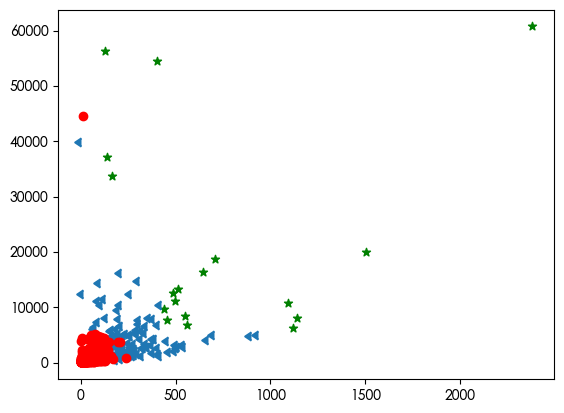

In [31]:
plt.scatter(df_user.query("总体价值 == '高价值'")['F值'],
 df_user.query("总体价值 == '高价值'")['M值'],c='g',marker='*')
plt.scatter(df_user.query("总体价值 == '中价值'")['F值'],
 df_user.query("总体价值 == '中价值'")['M值'],marker=8)
plt.scatter(df_user.query("总体价值 == '低价值'")['F值'],
 df_user.query("总体价值 == '低价值'")['M值'],c='r')